# Proyek UTS PMDPM Gasal 2023/2024

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

- Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM Gasal 2023/2024

- Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan.
- Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing dan encoding, modelling, dan evaluasi model.

- Pada bagian akhir silahkan berikan laporan singkat berupa jawaban pertanyaan dari proyek yang sudah dikerjakan.

### Inisialisasi

- Bagian berikut berisi import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Loading

- Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive jika menggunakan Google Colab)

In [ ]:
uts1 = pd.read_csv("/content/drive/MyDrive/Mesin/Dataset UTS.csv")
uts1.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [ ]:
sns.set_context("poster")
df_uts = pd.read_csv('Dataset UTS.csv')

df_uts.head(10)

### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.
- Jika jumlah kelas pada data latih tidak seimbang, kalian dapat menggunakan metode oversampling.
- Untuk **klasifikasi**, pastikan **Kategori menjadi target** dan **kolom Harga dihapus**.

In [ ]:
uts2 = uts1.drop('price', axis=1)
uts2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,Luxury


In [ ]:
print("data null \n",uts2.isnull().sum())
print("data kosong \n",uts2.empty)
print("data nan \n",uts2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [ ]:
print("Sebelum pengecekan data duplikat",uts2.shape)
cols_to_check = ["squaremeters","numberofrooms","hasyard","haspool",
                 "floors","citycode","citypartrange",
                 "numprevowners","made","isnewbuilt","hasstormprotector",
                 "basement","attic","garage","hasstorageroom","hasguestroom",'category']

uts3 = uts2[~uts2[cols_to_check].duplicated(keep='last')]
print("Sesudah pengecekan data duplikat",uts3.shape)

Sebelum pengecekan data duplikat (10000, 17)
Sesudah pengecekan data duplikat (10000, 17)


In [ ]:
uts2.category.value_counts()

Basic     4344
Luxury    3065
Middle    2591
Name: category, dtype: int64

### Train-test split

- Untuk nilai parameter random_state, sesuaikan dengan dua digit terakhir nomor pegawai terbesar (red: dua digit terakhir NPM terbesar).
- Silahkan memodifikasi persentase train-test split terbaik antara 80:20, 75:25, atau 70:30.

In [ ]:
from sklearn.model_selection import train_test_split

X = uts2.drop(columns=['category'])
y = uts2.category

X_train_bf, X_test, y_train_bf, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
print(X_train_bf.shape)
print(X_test.shape)

(8000, 16)
(2000, 16)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train_bf)
X_test_enc= transformer.transform(X_test)


df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

X_enc=df_train_enc

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,69.0,4.0,28290.0,1.0,7.0,1996.0,8825.0,6894.0,329.0,3.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35.0,20.0,78664.0,1.0,10.0,1995.0,7528.0,1094.0,219.0,9.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,97.0,44.0,48559.0,8.0,6.0,2012.0,9379.0,8734.0,958.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,84.0,96.0,70430.0,8.0,8.0,1996.0,3856.0,346.0,331.0,5.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,61.0,63.0,17514.0,8.0,7.0,2016.0,8808.0,6952.0,999.0,1.0
5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,15.0,11.0,40862.0,2.0,3.0,2014.0,1832.0,6736.0,878.0,3.0
6,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,84.0,95.0,62672.0,7.0,9.0,2018.0,6502.0,5899.0,438.0,0.0
7,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.0,14.0,72870.0,7.0,7.0,2004.0,8764.0,3150.0,427.0,4.0
8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,26.0,82.0,90745.0,7.0,5.0,1991.0,4052.0,3302.0,397.0,0.0
9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,50.0,96.0,77787.0,9.0,4.0,2021.0,187.0,9880.0,981.0,2.0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
print(Counter(y_train_bf))

X_train,y_train = smt.fit_resample(X_train_enc,y_train_bf)
print(Counter(y_train))

Counter({'Basic': 3478, 'Luxury': 2436, 'Middle': 2086})
Counter({'Luxury': 3478, 'Basic': 3478, 'Middle': 3478})


### Modelling

#### Tugas Klasifikasi
- Buatlah dua Pipeline untuk perbandingan model algoritme.
- Tahap pemodelan dimulai dari data scaling, feature selection, hingga algoritme classifier.
- Bandingkan dua metode penskalaan yaitu StandardScaler dan MinMaxScaler menggunakan parameter grid.
- Kalian perlu bereksperimen dengan membandingkan dua dari empat metode feature selection (SelectKBest, SelectPercentile, SelectFromModel, dan RFE) dan jumlah feature yang dipilih menggunakan parameter grid.
- Kalian wajib menyesuaikan parameter dari algoritme classifier yang kalian pilih agar model dapat bekerja dengan baik pada dataset.
- Dua algoritme classifier yang dibandingkan bebas.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix

pipe_KNN = Pipeline(steps=[
    ('scale',MinMaxScaler()),
    ('feat_select',SelectKBest()),
    ('clf',KNeighborsClassifier())])


param_grid_KNN= [
    {'feat_select__k': np.arange(2,5),
     'clf__n_neighbors': [3, 5, 7, 9],
     'clf__weights': ['uniform', 'distance'],
     'clf__p': [1, 2]},
    {
      'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier
       (random_state=50,max_depth=3),max_features=4)],
      'clf__n_neighbors': [3, 5, 7, 9],
      'clf__weights': ['uniform', 'distance'],
      'clf__p': [1, 2]
      }
]

GSCV_KNN = GridSearchCV(pipe_KNN, param_grid_KNN,cv=StratifiedKFold(n_splits=5))
GSCV_KNN.fit(X_train_enc,y_train_bf)

mask = GSCV_KNN.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_KNN.best_estimator_))
print("Selected features:{}".format(X_enc.columns[mask]))

print("Best CV score: {:.2f}".format(GSCV_KNN.best_score_))
print("Test set score: {:.2f}".format(GSCV_KNN.score(X_test_enc,y_test)))

Best model:Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf', KNeighborsClassifier(n_neighbors=9, p=1))])
Selected features:Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.94
Test set score: 0.94


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

pipe_DT = Pipeline(steps=[
    ('feat_select',SelectKBest()),
    ('clf',DecisionTreeClassifier(random_state=50))])

param_grid_DT = [
    {'feat_select__k': np.arange(2,5),
     'clf__max_depth': [2,3,4,5],
     'clf__criterion': ['gini','entropy']
    },
    {
      'feat_select' : [SelectFromModel
       (estimator=DecisionTreeClassifier(random_state=50),max_features=4)],
      'clf__max_depth': [2,3,4,5],
      'clf__criterion': ['gini','entropy']
      }
]

GSCV_DT = GridSearchCV(pipe_DT, param_grid_DT, cv=StratifiedKFold(n_splits=5))
GSCV_DT.fit(X_train_enc, y_train_bf)

mask = GSCV_DT.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_DT.best_estimator_))
print("Selected features:{}".format(X_enc.columns[mask]))

print("Best CV score: {:.2f}".format(GSCV_DT.best_score_))
print("Test set score: {:.2f}".format(GSCV_DT.score(X_test_enc,y_test)))

Best model:Pipeline(steps=[('feat_select',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=50),
                                 max_features=4)),
                ('clf', DecisionTreeClassifier(max_depth=5, random_state=50))])
Selected features:Index(['onehotencoder__hasyard_no', 'onehotencoder__isnewbuilt_new',
       'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.94
Test set score: 0.94


### Evaluasi Model

- Evaluasi dilakukan dengan membuat masing-masing dua Grid Search Cross Validation dengan metode Stratified KFold Cross Validation.
- **Untuk klasifikasi, tampilkan feature yang relevan dipilih oleh model, hasil pengukuran kinerja model klasifikasi dengan confusion matrix, serta metrik accuracy, precision, recall, dan F1-score. Untuk memudahkan pimpinan divisi membaca hasil, buatlah confusion matrix dalam bentuk representasi visual menggunakan fungsi ConfusionMatrixDisplay dari library scikit-learn.**

In [ ]:
#lakukan proses evaluasi model algoritme pembelajaran mesin
pred = GSCV_KNN.predict(X_test_enc)

print("Confusion matrix KNN:\n",confusion_matrix(y_test,pred))
print("Classification report KNN:\n",classification_report(y_test, pred, zero_division=0))

Confusion matrix KNN:
 [[804   0  62]
 [  0 629   0]
 [ 68   0 437]]
Classification report KNN:
               precision    recall  f1-score   support

       Basic       0.92      0.93      0.93       866
      Luxury       1.00      1.00      1.00       629
      Middle       0.88      0.87      0.87       505

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.94      0.93      2000



In [ ]:
pred = GSCV_DT.predict(X_test_enc)

print("Confusion matrix DT:\n",confusion_matrix(y_test,pred))
print("Classification report DT:\n",classification_report(y_test,pred,zero_division=0))

Confusion matrix DT:
 [[749   0 117]
 [  0 629   0]
 [  7   1 497]]
Classification report DT:
               precision    recall  f1-score   support

       Basic       0.99      0.86      0.92       866
      Luxury       1.00      1.00      1.00       629
      Middle       0.81      0.98      0.89       505

    accuracy                           0.94      2000
   macro avg       0.93      0.95      0.94      2000
weighted avg       0.95      0.94      0.94      2000



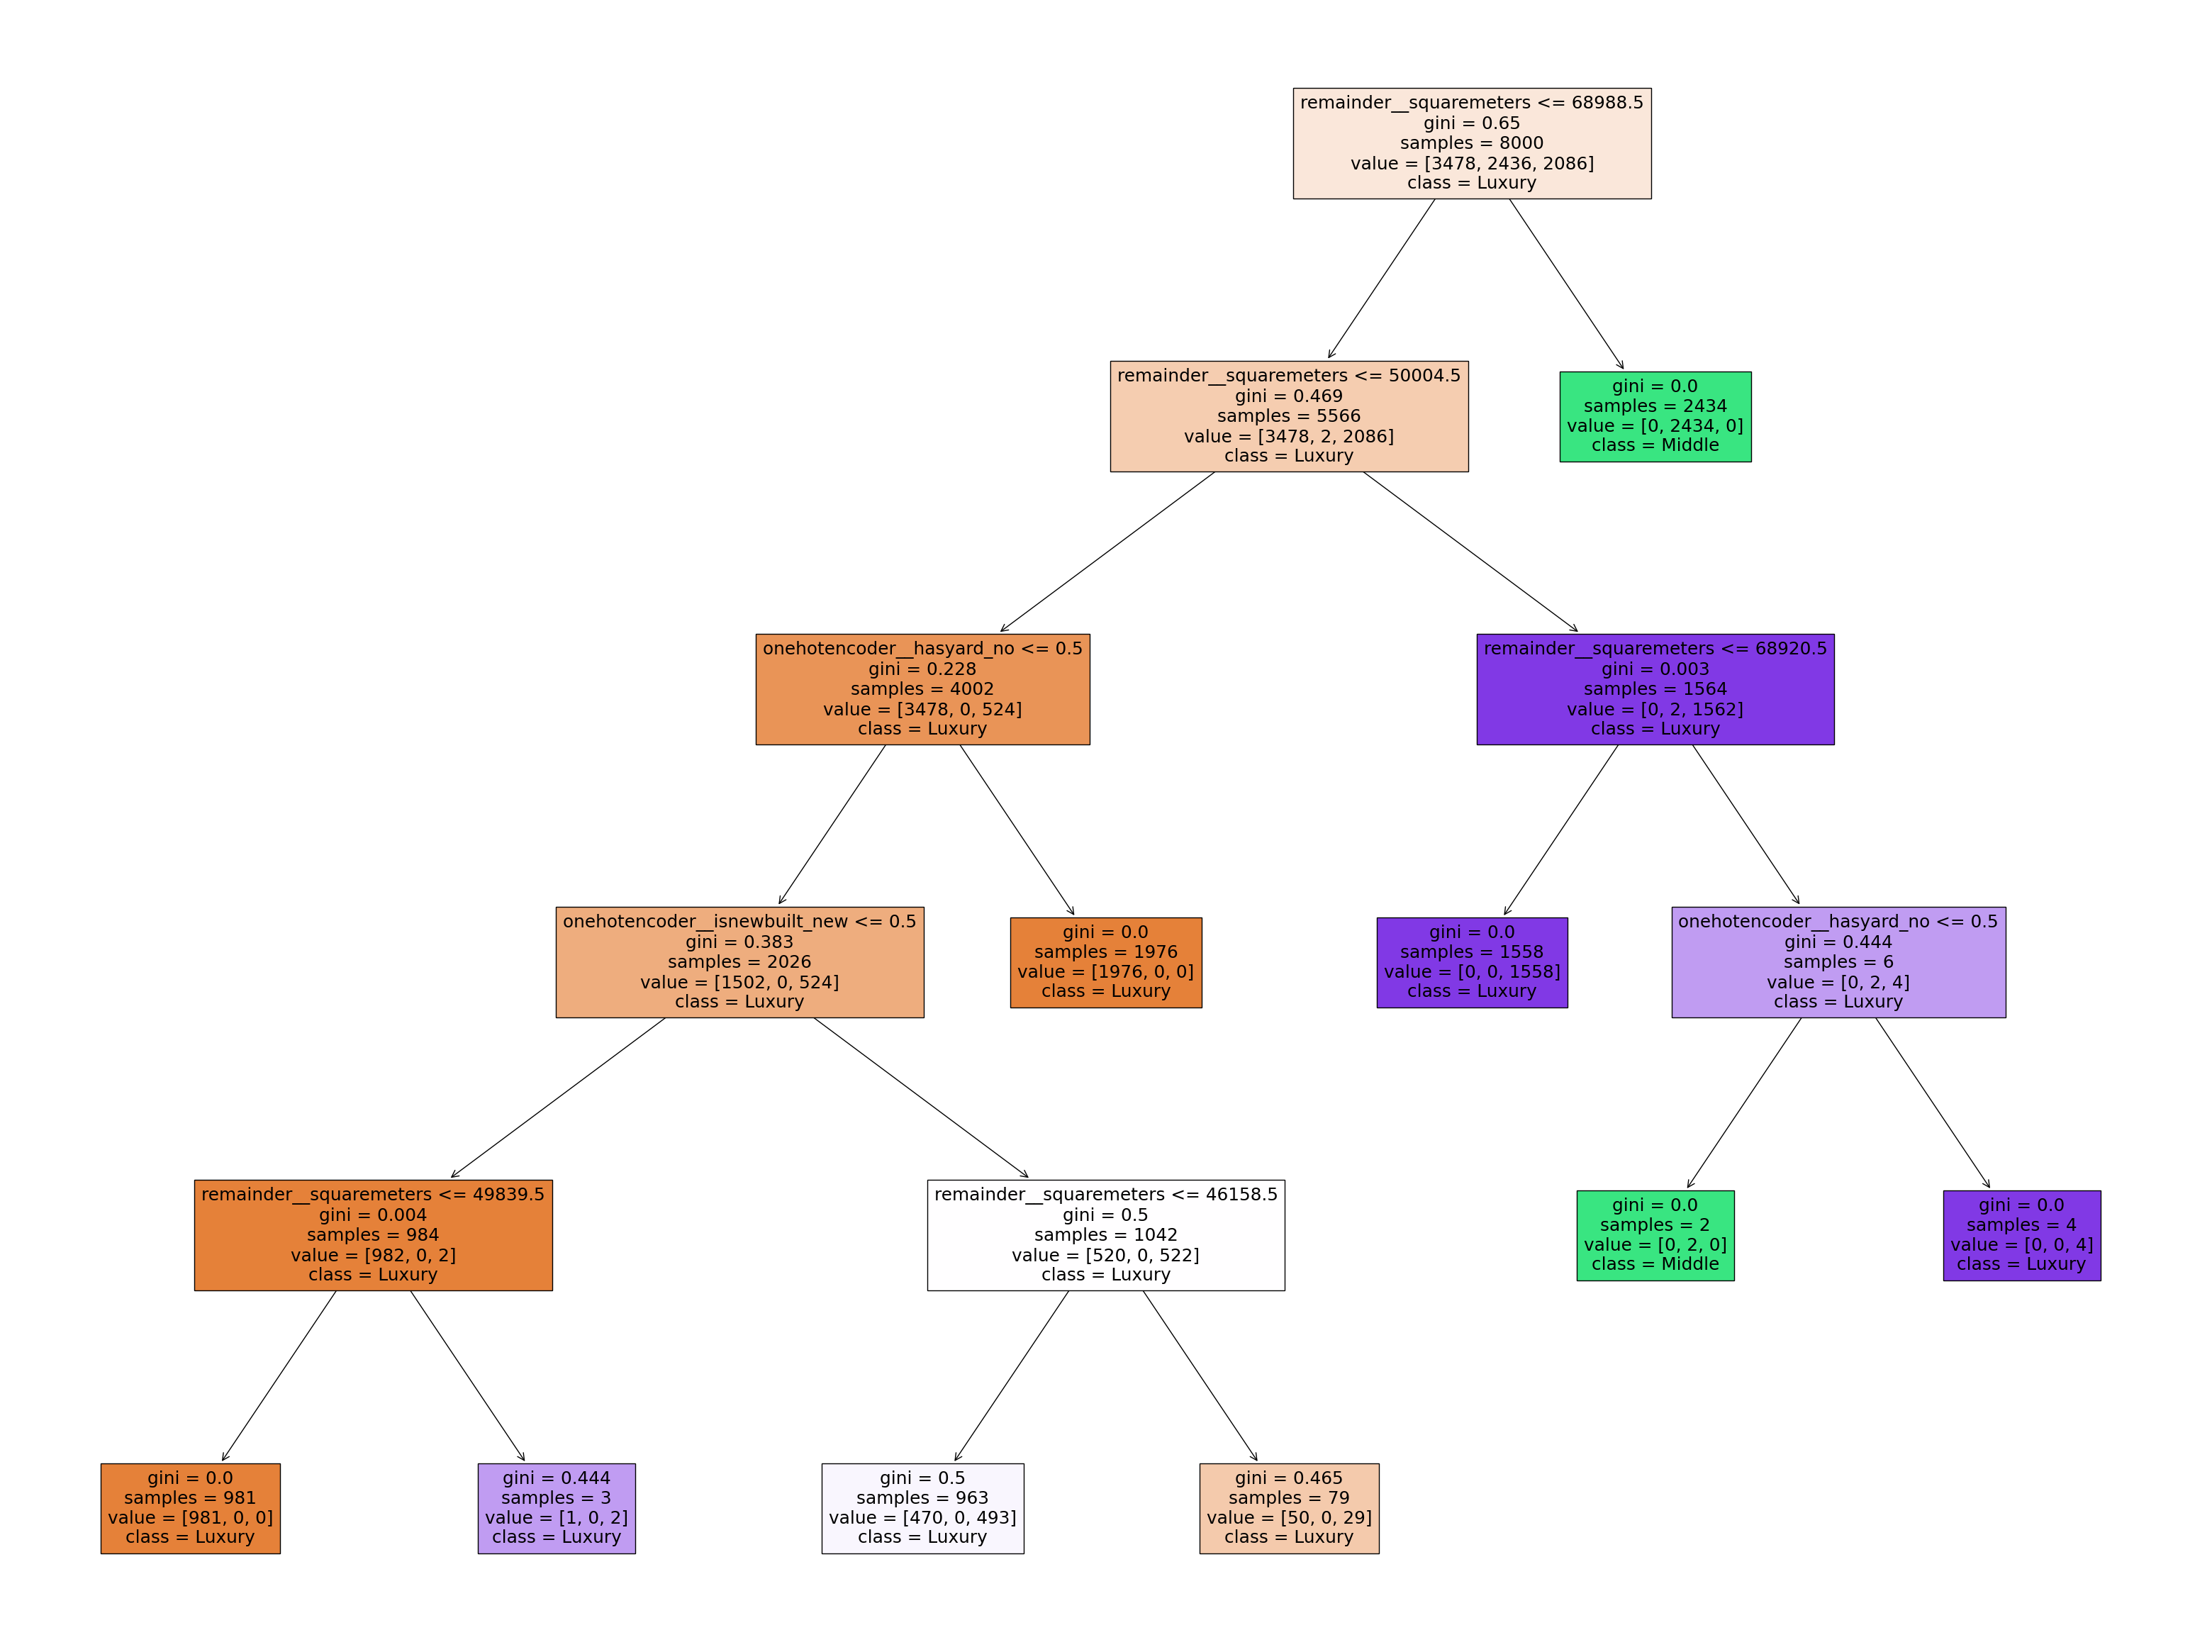

In [ ]:
from matplotlib import pyplot as plt

DT_model = GSCV_DT.best_estimator_.named_steps['clf']

plt.figure(figsize = (40,30))
pict = plot_tree(DT_model, filled=True, feature_names = X_enc.columns[mask], class_names=uts2.category)

### Data Cleansing & Encoding Regresi

- Load kembali dataset yang akan digunakan.
- Ubah data kategorik string menjadi numerik.
- Untuk **regresi**, pastikan **Harga menjadi target** dan **kolom Kategori dihapus**.

In [ ]:
df_uts = pd.read_csv('Dataset UTS.csv')

df_uts.head(10)

In [ ]:
print("data null \n",df_uts.isnull().sum())
print("data kosong \n",df_uts.empty)
print("data nan \n",df_uts.isna().sum())

In [ ]:
#pengecekan Data Duplikat
print("Sebelum pengecekan data duplikat",df_uts.shape)
cols_to_check = ["squaremeters","numberofrooms","hasyard",
                 "haspool","floors", "citycode","citypartrange",
                 "numprevowners", "made", "isnewbuilt", "hasstormprotector" ,
                 "basement", "attic", "garage", "hasstorageroom",
                 "hasguestroom","price", "category" ]

df_uts1 = df_uts[~df_uts[cols_to_check].duplicated(keep='last')]
print("Sesudah pengecekan data duplikat",df_uts1.shape)

df_uts1.price.round(1)


In [ ]:
df_uts1.price.plot(kind='box')

In [ ]:
from sklearn.model_selection import train_test_split


X=df_uts1.drop(columns=['category','price'],axis=1)
y=df_uts1.price



X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=85)


print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols=['hasyard', 'haspool','isnewbuilt',
          'hasstormprotector','hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train)
X_test_enc= transformer.transform(X_test)


df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

#### Tugas Regresi
- Buatlah dua Pipeline untuk perbandingan model algoritme.
- Bandingkan dua metode penskalaan yaitu StandardScaler dan MinMaxScaler menggunakan parameter grid.
- Kalian juga perlu menyesuaikan parameter dari algoritme regressor yang kalian pilih agar model dapat bekerja dengan baik pada dataset.
- Dua algoritme regressor yang dibandingkan bebas.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

pipe_LR = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('reg', LinearRegression())
    ])

param_grid_LR = {

}

GSCV_LR = GridSearchCV(pipe_LR,param_grid_LR, cv=5, scoring='neg_mean_squared_error')
GSCV_LR.fit(X_train_enc, y_train)

print("Best model:{} ".format(GSCV_LR.best_estimator_))
print('Koefisien/bobot:{}'.format(GSCV_LR.best_estimator_.named_steps['reg'].coef_))
print('Intercept/Bias:{}'.format(GSCV_LR.best_estimator_.named_steps['reg'].intercept_))

LR_pred = GSCV_LR.predict(X_test_enc)

mae_LR = mean_absolute_error(y_test, LR_pred)
mse_LR = mean_squared_error(y_test, LR_pred)

print("LR MAE: ", mae_LR)
print("LR MSE: ", mse_LR)
print("LR Root Mean Square Error: ", np.sqrt(mse_LR))

In [ ]:
df_result = pd.DataFrame(y_test)
df_result['LR_pred'] = LR_pred.round(1)
df_result.head(10)

In [ ]:
from sklearn.linear_model import Ridge

pipe_Ridge = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('reg', Ridge())
    ])

param_grid_Ridge = {
    'reg__alpha': [0.1, 1, 10, 100, 1000],
    'reg__tol': [0.1, 1, 10, 100, 1000],
    'reg__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'reg__random_state': [85]
    }

GSCV_Ridge = GridSearchCV(pipe_Ridge,param_grid_Ridge, cv=5, scoring='neg_mean_squared_error')
GSCV_Ridge.fit(X_train_enc, y_train)

print("Best model:{} ".format(GSCV_Ridge.best_estimator_))
print('Koefisien/bobot:{}'.format(GSCV_Ridge.best_estimator_.named_steps['reg'].coef_))
print('Intercept/Bias:{}'.format(GSCV_Ridge.best_estimator_.named_steps['reg'].intercept_))

Ridge_pred = GSCV_Ridge.predict(X_test_enc)

mse_Ridge = mean_squared_error(y_test, Ridge_pred)
mae_Ridge = mean_absolute_error(y_test, Ridge_pred)

print("Ridge MAE: ", mae_Ridge)
print("Ridge MSE: ", mse_Ridge)
print("Ridge Root Mean Square Error: ", np.sqrt(mse_Ridge))

df_result['Ridge_pred'] = Ridge_pred.round(1)
df_result.head(10)

In [ ]:
df_final = df_result.head(300)

In [ ]:
plt.figure(figsize=(30,5))
data_len = range(1,301)

plt.scatter(data_len, df_final.price, color='blue', label='Actual')
plt.plot(data_len, df_final['LR_pred'], color='green',linestyle='--', label='LR')

plt.legend()
plt.title('Perbadingan Data Actual dan Prediksi Linear Regression')
plt.show()

In [ ]:
plt.figure(figsize=(30,5))
plt.scatter(data_len, df_final.price, color='blue', label='Actual')
plt.plot(data_len, df_final['Ridge_pred'], color='black',linestyle='-.', label='Ridge')

plt.legend()
plt.title('Perbadingan Data Actual dan Prediksi Ridge Regression')
plt.show()

### Evaluasi Model

- Evaluasi dilakukan dengan membuat masing-masing dua Grid Search Cross Validation dengan metode Stratified KFold Cross Validation.
- **Untuk regresi, tampilkan hasil pengukuran kinerja model regresi dengan Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error. Untuk memudahkan pimpinan divisi membaca hasil, buatlah tabel yang menampilkan perbandingan harga asli properti dan harga hasil prediksi dua model regresi beserta grafik visualnya.**

## Kesimpulan

Silahkan jawab pertanyaan berikut pada cell markdown yang sudah disediakan:

**Klasifikasi**

1. Apa saja feature-feature yang relevan untuk membedakan antara rumah basic, middle, dan luxury?
- Untuk model KNN yang digunakan adalah 'onehotencoder__hasyard_yes', 'onehotencoder__haspool_no', 'onehotencoder__haspool_yes', 'remainder__squaremeters'
- Untuk model Decision Tree yang digunakan adalah 'onehotencoder__hasyard_no', 'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'

2. Model classifier apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?
Kedua model memiliki performa yang sama

3. Dari hasil Confusion Matrix dan Classification Report, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?
Kedua model memiliki hasil yang relatif sama

**Regresi**

1. Model regressor apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

- Model Regressor terbaik adalah model Rigde Regression dengan memiliki nilai MAE dan MSE yang lebih kecil dari Linear Regression
- Untuk Ridge Regression , parameter setting yang paling optimal adalah alpha = 0.1 , solve ='svd' dan tol = 0.1

4. Dari hasil metrik evaluasi, hasil prediksi, dan grafik regresi, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?
-Model Algoritma Machine Learning yang dikembangkan memiliki prediksi yang akurat dengan pemyimpangan nilai yan kecil

*tulis jawaban kalian di cell ini*

Kelompok: 1
Gideon Bahtera A.P. / 21071125-
Nama anggota 2 / NPM
Nama anggota 3 / NPM
Nama anggota 4 / NPM

Jawaban:

**Klasifikasi**
1. Apa saja feature-feature yang relevan untuk membedakan antara rumah basic, middle, dan luxury?
- Untuk model KNN yang digunakan adalah 'onehotencoder__hasyard_yes', 'onehotencoder__haspool_no', 'onehotencoder__haspool_yes', 'remainder__squaremeters'
- Untuk model Decision Tree yang digunakan adalah 'onehotencoder__hasyard_no', 'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'

2. Model classifier apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?
Kedua model memiliki performa yang sama

3. Dari hasil Confusion Matrix dan Classification Report, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?
Kedua model memiliki hasil yang relatif sama

**Regresi**
1. Model regressor apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

- Model Regressor terbaik adalah model Rigde Regression dengan memiliki nilai MAE dan MSE yang lebih kecil dari Linear Regression
- Untuk Ridge Regression , parameter setting yang paling optimal adalah alpha = 0.1 , solve ='svd' dan tol = 0.1

4. Dari hasil metrik evaluasi, hasil prediksi, dan grafik regresi, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?
-Model Algoritma Machine Learning yang dikembangkan memiliki prediksi yang akurat dengan pemyimpangan nilai yan kecil